# Analiza plezalnih vzponov v slovenskih plezališčih

## Zajemanje podatkov
Javascript na strani 8a.nu/ascents glede na zahtevane parametre vrne urejen JSON zadnjih 10.000 vzponov v Sloveniji. Žal to ni dovolj za dobro analizo, saj podatki ne sežejo dlje od leta 2018. Zato sem podatke dobil na nasilen način.

### Zajete spletne strani in [regex](https://en.wikipedia.org/wiki/Inferno_(Dante)#Ninth_Circle_(Treachery))

- [Seznam plezališč](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/data/plezalisca.json) sem pridobil s funkcijama [`vsa_slovenska_plezalisca_in_balvanisca()`](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/src/nalozi_podatke.py#L13) in [`strik_v_json`](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/src/parse_plezalisca.py#L13).
- Za vsako plezališče sem pridobil [html datoteko](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/data/vzponi_bohinjska-bela.html) z uporabo funkcije [`vsi_vzponi_v_plezaliscih()`](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/src/nalozi_podatke.py#L34) in izluščil podatke s pomočjo demonov, ki jih prikliče [`vzponi_strik_v_json_csv()`](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/src/parse_plezalisca.py#L72).

Urejeni podatki so shranjeni v datoteki [vzponi_strik.csv](https://github.com/urhprimozic/plezalni-vzponi-v-sloveniji/blob/main/data/vzponi_strik.csv).


# Analiza
## Priprava podatkov
Pripravimo vse tabele, ker itak nimam več pojma kaj je kej. TODO

In [1]:
import pandas as pd
%matplotlib inline
pd.set_option('display.max_rows', 10)
vzponi = pd.read_csv('data/vzponi.csv') # vsi podatki
plezalci = pd.read_csv('data/plezalci.csv') # plezalci - id 
smeri = pd.read_csv('data/smeri.csv') # smer - id
plezalisca = pd.read_csv('data/plezalisca.csv')  # plezalisce - id
smeri_s_plezalisci = pd.read_csv('data/smeri_plezalisca.csv') # smer + plezalisce (lep groupby)

## Osnovni rezultati

### Velikosti plezališč
Mera za velikost naj bo število smeri. Primerjava z realnim stanjem izkazuje krhkost rezultatov. V resnici je v Dovžanovi soteski namesto 42 kar 50 smeri, v Kamnitniku pa, po podatnik vodnička iz 2017, le 38. [8a.nu](https://www.8a.nu/) je uporabniško grajena spletna stran, zato prihaja do raznih tipkarskih in drugih napak, ki povzročijo odstopanja. Slaba kvaliteta vodničkov na strani pa ne vpliva na analizo, le zavedati se je treba, da analiziramo le vzpone, zabeležene na 8a.nu. Verjetno so vse številke v lokalnih plezališčih za kakšen faktor višje (V Tržiču je uporaba portala nezaželjena.).

Dovžanova soteska:  42 
Kamnitnik:  59


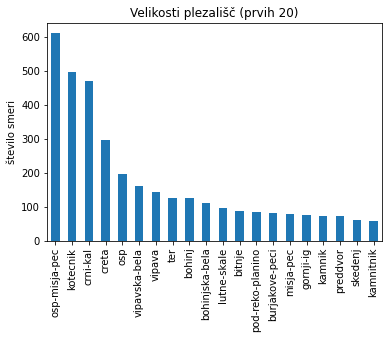

In [2]:
smeri_plezalisca = pd.merge(smeri, plezalisca)[['smer', 'plezalisce']].drop_duplicates()
smeri_plezalisca.groupby('plezalisce').size().sort_values(ascending=False).head(20).plot.bar(title='Velikosti plezališč (prvih 20)', xlabel='', ylabel="število smeri")
print('Dovžanova soteska: ' , len( smeri_plezalisca[smeri_plezalisca['plezalisce'] == 'dolanova-soteska']) , '\nKamnitnik: ', len(smeri_plezalisca[smeri_plezalisca['plezalisce'] == 'kamnitnik']))

### Najbolj obiskana plezališča in  smeri
Velikosti posameznih plezališč sovpadajo z obiskanostjo. Poleg primorske je blazno obiskan še Kotečnik.

smer-plezalisce
Rodeo osp-misja-pec                 208
Ptičja perspektiva osp-misja-pec    152
N.N. osp-misja-pec                  151
Albanski konjak osp-misja-pec       138
Hobit osp-misja-pec                 127
Sreča vrtnice osp-misja-pec         125
Tortuga osp-misja-pec               124
Kindergarten osp-misja-pec          121
Krvavica osp-misja-pec              119
Hrenovka osp-misja-pec              117
dtype: int64

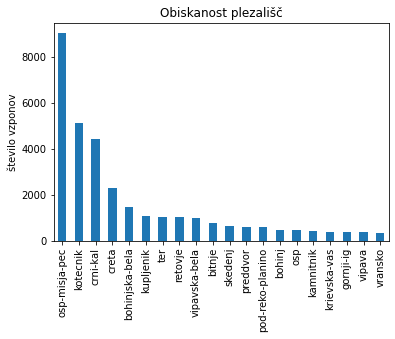

In [6]:
# neberljiva koda goes brrr
# obiskanost plezališč
plezalisca.groupby('plezalisce').size().sort_values(ascending=False).head(20).plot.bar(title='Obiskanost plezališč', xlabel='', ylabel="število vzponov")
# najbolj plezane smeri
smeri_s_plezalisci.groupby('smer-plezalisce').size().sort_values(ascending=False).head(10)

## Filozofi
Poiščimo ljudi, ki pišejo najdaljše komentarje.

<AxesSubplot:title={'center':'Skupne dolžine komentarjev'}>

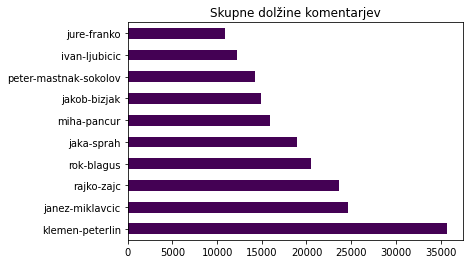

In [52]:
# komentarji
komentarji = vzponi[vzponi['komentar'] == vzponi['komentar']]
komentarji = komentarji[['uporabnik', 'plezalec', 'komentar']]
komentarji['dolzina']  = komentarji['komentar'].apply(len)
# dolzine
dolzine = komentarji[['uporabnik', 'dolzina']]
dolzine.groupby('uporabnik').sum().sort_values(by='dolzina', ascending= False).head(10).plot.barh(title='Skupne dolžine komentarjev',legend=False, xlabel='', colormap='viridis')

Bolj realno oceno povedo povprečja. Zahteval pa bom, da ima uporabnik vsaj 5 komentarjev, saj me zanimajo filozofi, ki so šli plezat več kot trikrat.

In [ ]:
dolzine = dolzine[dolzine.groupby('uporabnik')]